In [3]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [92]:
path = r'C:\Users\monam\Desktop\dataitgirls 6\데모데이\dataset'
df = pd.read_excel(path + '/review_v2.xlsx')

In [93]:
df=df.rename(columns={'색상':'r_color',
                  '사이즈': 'size',
                  '구매자상태':'status',
                  '품질':'quality',
                  '난이도':'level',
                  '구성':'comp',
                  '배송':'r_delivery',
                  '기타':'etc',
                  '구매목적':'object',
                  '감정':'sentiment'})

In [94]:
df.columns

Index(['review_index', 'product_name', 'product_id', 'score', 'date', 'color',
       'color_sort', 'reshop', 'onemonth', 'category', 'review',
       'review_tokenize', 'r_color', 'size', 'status', 'quality', 'level',
       'comp', 'r_delivery', 'etc', 'object', 'sentiment', 'total'],
      dtype='object')

In [95]:
tf = df[['review_index','r_color', 'size', 'status', 'quality', 'level', 'comp', 'r_delivery', 'etc', 'object', 'sentiment']]

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='total'>

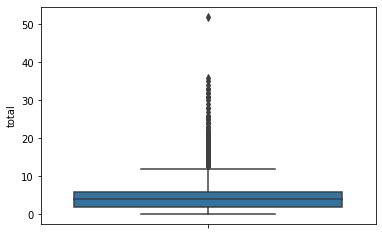

In [97]:
sns.boxplot(y=df['total'])

In [142]:
df[['review', 'total']].sort_values(by='total', ascending=False).head(50)

,review,total
6469,재미나요 손재주 1도 없는 똥손이에요 실이 얇기도 하고 실 주변에 잔털이라고 하나요...,52
8877,동영상이 있어서 어렵지 않아요 동영상에서 설명을 잘 해주셔서 따라 하기 문제없어요 ...,36
7174,저의 첫 코바늘 세트인데 첫 식빵은 넘나 힘들었지만 4개쯤 뜨고 나니 겁도 없이 이...,35
5859,왕초보입니다 예전에 친구할 때 옆에서 한번 배우고 떠보고 한 것이 다입니다 코바늘 ...,34
5515,후기에 실이 부족하다는 의견이 많아서 더 시킬까 고민하다가 남았다는 후기나 적당하다...,33
249,미니스퀘어백 중독 한 번만 뜬 사람은 없다는 말 못 믿었는데 믿게 됐어요 지금 6개...,33
10411,재구매입니다 바늘이야기 앱에서 주문하고 싶었는데 앱에서는 식빵 포장지를 판매하지 ...,33
10706,후기 수정이요 어제 후기 올렸었는데 아침에 다 풀어서 다시 했어요 동영상 찾아보니 ...,32
8784,진짜 코바늘뜨기 1도 몰랐던 사람입니다 진짜 코바늘뜨기 1도 몰랐던 사람이에요 24...,32
12414,먼지 케이스 만들고 싶어서 검은색 주문했는데 검은색은 어려울 것 같아서 일단 같이 ...,31


In [124]:
df[['review', 'total']].sort_values(by='total', ascending=False).tail(50)

,review,total
8399,또 사서 다시 뜨고 있어요,0
1415,이 실만 몇 개 짼지 조금만 더 싸지길 바라봅니다,0
8392,잘 받았어요,0
8391,잘 받았습니다,0
8381,잘 받았어요,0
4333,실 잘 받았습니다 이제부터 열심히 해볼게요,0
8380,잘 해볼게요,0
8379,잘 받았습니다,0
2623,실이 엄청 부드러워요,0
8368,아직 안 해봤는데,0


In [143]:
df['total'].describe()

count    12876.000000
mean         4.651445
std          3.665528
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         52.000000
Name: total, dtype: float64

In [98]:
df['review'][df['total'] == 6]

24               털실 알레르기가 약간 있어서 면사만 사용하는데 기자 면사는 정말 최고입니다
29       다른 색의 실도 써보려고 추가로 샀습니다 실제로 보니 색이 더 이쁘네요 근데 두 개...
33       네주 그레이 엄마 인형 만드는데 드렸다 생각보다 복실거리는 느낌이 안 나고 어둡다는...
40       배송도 하루 만에 우체국 택배로 왔어요 실색상 이름처럼 너무 이쁘네요 합사해서 뜨려...
45            배송도 빠르고 실 색상도 너무 이쁘고 좋아요 서비스로 주신 수세미 실 잘 쓸게요
                               ...                        
12846              아직 삐뚤삐뚤 힘 조절도 힘들지만 혼자 할 수 있는 취미 생겨서 좋아요
12858                                빠른 배송 좋아요 털색은 조금 아쉬워요
12864           꼼꼼한 포장에 코바늘 할 생각에 벌써부터 설레어요 패키지 구성이 너무 알차요
12866      동영상이 빠르지 않고 천천히 잘 가르쳐줘서 좋아요 응용 편이 좀 더 있으면 좋겠습니다
12870                         똥손이라 그런가 초보자인데도 어렵네요 구성은 좋아요
Name: review, Length: 947, dtype: object

In [99]:
df['review'][df['total'] == 4]

6                      부드러워서 여러 용도의 소품들 다양하게 만들어 사용하고 있습니다
23                                   색도 사진에서 보는 것과 같고 이쁘네요
25                         색도 너무 이쁘고 티 코스터 말고도 활용도도 좋을듯합니다
43                                실물이 훨씬 이쁜 실 같아요 배송도 빠르고요
44                            색상이 실제로 보니 더 이쁜 거 같아요 맘에 들어요
                               ...                        
12844                   아직 시작은 안 했지만 기초를 다지는데 도움은 많이 되겠습니다
12848                             도안 보는 법부터 알려주니까 쉽고 재밌습니다
12853    아 저 같은 똥 손은 이렇게 쉽게 설명을 해도 못하는 건가요 도대체 저는 왜 안되는...
12872              정말 기초 정복하지만 좀 더 응용한 도안이 있었으면 좋았을 것 같아요 
12874                                   처음 도전합니다 재밌을 것 같아요
Name: review, Length: 1706, dtype: object

In [100]:
from scipy import stats

In [101]:
stats.trim_mean(df['total'], 0.05)

4.282053494391717

In [102]:
tf.columns

Index(['review_index', 'r_color', 'size', 'status', 'quality', 'level', 'comp',
       'r_delivery', 'etc', 'object', 'sentiment'],
      dtype='object')

In [103]:
tf = tf.set_index(keys = 'review_index')

In [104]:
D = len(tf)
tf_sum = tf.astype(bool).sum(axis=0)
idf = np.log((D+1) / (tf_sum+1)) + 1             # IDF (Inverse Document Frequency)


# TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf = tf * idf                      
tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)

In [105]:
tfidf

,r_color,size,status,quality,level,comp,r_delivery,etc,object,sentiment
review_index,,,,,,,,,,
11818,0.000000,0.0,0.000000,0.814287,0.000000,0.000000,0.000000,0.580463,0.000000,0.000000
11819,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9261,0.898201,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.439585
11203,0.229874,0.0,0.193946,0.463430,0.311194,0.000000,0.000000,0.495533,0.189644,0.562508
272,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
5154,0.000000,0.0,0.000000,0.000000,0.000000,0.752888,0.000000,0.000000,0.000000,0.658149
5156,0.000000,0.0,0.580176,0.000000,0.465460,0.577479,0.000000,0.000000,0.000000,0.336542
5158,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.978201,0.000000,0.000000,0.207660


In [106]:
tfidf['total'] = tfidf[['r_color', 'size', 'status', 'quality', 'level', 'comp', 'r_delivery',
       'etc', 'object', 'sentiment']].sum(axis=1)

In [107]:
tfidf.sort_values(by='total', ascending=False)

,r_color,size,status,quality,level,comp,r_delivery,etc,object,sentiment,total
review_index,,,,,,,,,,,
8137,0.334701,0.410706,0.282389,0.337382,0.453106,0.281077,0.0,0.240503,0.276126,0.327610,2.943601
11445,0.150582,0.184776,0.381140,0.455364,0.203852,0.505825,0.0,0.324606,0.372687,0.221087,2.799919
3713,0.198717,0.243842,0.167658,0.400617,0.403523,0.333758,0.0,0.571159,0.163940,0.291760,2.774976
453,0.000000,0.342863,0.471486,0.281652,0.378260,0.234647,0.0,0.401551,0.230515,0.410241,2.751215
8353,0.340140,0.208690,0.143489,0.342865,0.345352,0.142822,0.0,0.611027,0.280613,0.332934,2.747931
...,...,...,...,...,...,...,...,...,...,...,...
2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
12417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
6621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


<AxesSubplot:ylabel='total'>

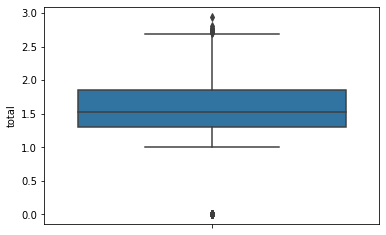

In [108]:
sns.boxplot(y=tfidf.total)

In [109]:
tfidf = tfidf.reset_index()

In [117]:
pd.merge(left=df[['review_index', 'review', 'total']], right = tfidf[['review_index','total']], on='review_index').sort_values(by='total_x', ascending=False).head(50)

,review_index,review,total_x,total_y
6469,2663,재미나요 손재주 1도 없는 똥손이에요 실이 얇기도 하고 실 주변에 잔털이라고 하나요...,52,2.519612
8877,2692,동영상이 있어서 어렵지 않아요 동영상에서 설명을 잘 해주셔서 따라 하기 문제없어요 ...,36,2.499620
7174,683,저의 첫 코바늘 세트인데 첫 식빵은 넘나 힘들었지만 4개쯤 뜨고 나니 겁도 없이 이...,35,2.414599
5859,8836,왕초보입니다 예전에 친구할 때 옆에서 한번 배우고 떠보고 한 것이 다입니다 코바늘 ...,34,2.376681
5515,6652,후기에 실이 부족하다는 의견이 많아서 더 시킬까 고민하다가 남았다는 후기나 적당하다...,33,2.185699
249,7184,미니스퀘어백 중독 한 번만 뜬 사람은 없다는 말 못 믿었는데 믿게 됐어요 지금 6개...,33,2.241752
10411,4680,재구매입니다 바늘이야기 앱에서 주문하고 싶었는데 앱에서는 식빵 포장지를 판매하지 ...,33,2.226307
10706,5875,후기 수정이요 어제 후기 올렸었는데 아침에 다 풀어서 다시 했어요 동영상 찾아보니 ...,32,2.360269
8784,2587,진짜 코바늘뜨기 1도 몰랐던 사람입니다 진짜 코바늘뜨기 1도 몰랐던 사람이에요 24...,32,2.574536
12414,7435,먼지 케이스 만들고 싶어서 검은색 주문했는데 검은색은 어려울 것 같아서 일단 같이 ...,31,2.283308


In [118]:
pd.merge(left=df[['review_index', 'review', 'total']], right = tfidf[['review_index','total']], on='review_index').sort_values(by='total_y', ascending=False).head(50)

,review_index,review,total_x,total_y
1607,8137,손이 좀 아프지만 실이 너무 탄탄하고 가방 떴을 때 정말 예뻐요 얼른 가방 만들어서...,11,2.943601
5307,11445,털실 색깔은 굉장히 마음에 들었어요 하지만 약간의 털 날림이 있더라고요 초보자이신 ...,23,2.799919
6130,3713,코바늘뜨기는 처음이라 동영상이 있다는 말에 안심했는데 영상이 초점이 너무 흐려서 몇...,18,2.774976
6974,453,간단하면서 너무너무 귀엽고 또 거품도 잘나고 선물용으로도 너무 좋아요 이거 산 나 ...,13,2.751215
5785,8353,영상이 친절해서 혼자서도 충분히 가능했습니다 빨간색은 모니터상에 색감보다 조금 쨍한...,21,2.747931
10695,5860,실 퀄리티가 좋아요 그런데 설명이 부족해서 조금 어려워요 여러 번 해본 사람들은 모...,8,2.744384
4988,5772,어깨끈 한쪽을 꼬이게 만들었지만 첫 작품치고는 맘에 들어요 컬러가 좀 들어간 실을 ...,10,2.742066
11642,8461,처음 하는 코바늘이라 어려움이 많았네요 다른 동영상도 계속 보면서 이해해 시어요 헷...,15,2.736550
11141,10697,처음에 뜨고 나서는 무늬가 마음에 들게 나오지 않아 몇 번을 뜨고 풀고를 반복하다 ...,14,2.724655
6289,1036,식빵 수세미 만들기로 뜨개질 처음 도전해봤는데 처음에는 몇 번이나 풀었다가 다시 해...,19,2.723528


In [129]:
tfidf['total'].describe()

count    12876.000000
mean         1.532352
std          0.460612
min          0.000000
25%          1.299309
50%          1.532397
75%          1.858708
max          2.943601
Name: total, dtype: float64

In [134]:
table = pd.merge(left=df[['review_index', 'review', 'total']], right = tfidf[['review_index','total']], on='review_index').sort_values(by='total_y', ascending=False)

In [139]:
table[table.total_y >=1.858].head(50)

,review_index,review,total_x,total_y
1607,8137,손이 좀 아프지만 실이 너무 탄탄하고 가방 떴을 때 정말 예뻐요 얼른 가방 만들어서...,11,2.943601
5307,11445,털실 색깔은 굉장히 마음에 들었어요 하지만 약간의 털 날림이 있더라고요 초보자이신 ...,23,2.799919
6130,3713,코바늘뜨기는 처음이라 동영상이 있다는 말에 안심했는데 영상이 초점이 너무 흐려서 몇...,18,2.774976
6974,453,간단하면서 너무너무 귀엽고 또 거품도 잘나고 선물용으로도 너무 좋아요 이거 산 나 ...,13,2.751215
5785,8353,영상이 친절해서 혼자서도 충분히 가능했습니다 빨간색은 모니터상에 색감보다 조금 쨍한...,21,2.747931
10695,5860,실 퀄리티가 좋아요 그런데 설명이 부족해서 조금 어려워요 여러 번 해본 사람들은 모...,8,2.744384
4988,5772,어깨끈 한쪽을 꼬이게 만들었지만 첫 작품치고는 맘에 들어요 컬러가 좀 들어간 실을 ...,10,2.742066
11642,8461,처음 하는 코바늘이라 어려움이 많았네요 다른 동영상도 계속 보면서 이해해 시어요 헷...,15,2.736550
11141,10697,처음에 뜨고 나서는 무늬가 마음에 들게 나오지 않아 몇 번을 뜨고 풀고를 반복하다 ...,14,2.724655
6289,1036,식빵 수세미 만들기로 뜨개질 처음 도전해봤는데 처음에는 몇 번이나 풀었다가 다시 해...,19,2.723528


In [141]:
table[table.total_y >=1.53].tail(50)

,review_index,review,total_x,total_y
1942,10375,가격도 저렴하고 배송도 빨라요,4,1.540843
6808,4676,배송 빨라요 동영상 자세하게 알려주셔서 좋아요,6,1.540399
9667,3678,배송도 빠르고 동영상 강의도 있어서 좋습니다,6,1.540399
11120,10264,배송도 빠르고 동영상 설명이 친절해요,6,1.540399
10830,323,빠른 배송과 동영상 설명이 좋았습니다,6,1.540399
12160,6121,배송도 빠르고 설명 동영상도 좋아요,6,1.540399
6810,4684,배송도 빠르고 동영상 설명이 있어 너무 좋네요,6,1.540399
5203,6677,영상은 설명이 알차고 좋습니다 배송도 빠르고요 제가 못 따라 할 뿐,6,1.540399
6446,2335,아직 뜨개질 해보지는 않았지만 뜨개질에 소질 없는 1인이지만 초보자 가능 문구가 크...,7,1.540303
12462,9855,배송도 빠르고 색상도 모니터와 같네요,4,1.539591


In [147]:
table2 = pd.merge(left=df, right = tfidf[['review_index','total']], on='review_index').sort_values(by='total_y', ascending=False)

In [150]:
table2 = table2.rename(columns={'total_x':'addpoint', 'total_y':'logpoint'})

In [153]:
table2.to_csv(path + './total_review.csv', index=False)